<center>

# Relazione 11

</center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

2023-07-13 11:34:32.912653: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-13 11:34:35.785669: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-13 11:34:35.830325: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-13 11:34:43.050651: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


L'obiettivo dell'esercitazione 11 è effettuare delle regressioni su dati caratterizzati da un certo rumore utilizzando delle reti neurali(NN): per fare questo lavoreremo con la libreria Keras. 

### The Prediction Problem

Consideriamo un processo che restituisce dei dati $\left(x,\,y\right)$. Le y sono generate come segue, ossia effettuando delle stime secondo l'equazione:
$$
    y_i= f(x_i) + \eta_i,
$$
dove $f(x_i)$ è una funzione fissata, mentre $\eta_i$ è un rumore di tipo gaussiano. La gaussiana ha valor medio zero e deviazione standard $\sigma$.

La struttura del NN determina la nostra abilità di andare a modellizzare la funzione f(x). Per conoscere i parametri del NN è necessario allenarla: per fare questo generiamo due differenti data-set. Il primo dei due è quello di **training**, che ci consente di allenare la rete, mentre il secondo è quello di **test**: il rapporto delle dimensioni di questi due data-set è uno a dieci. I valori di test sono differenti da quelli di training perchè noi siamo interessati a predire la funzione su valori che la nostra rete neurale non ha mai visto. Per misurare l'abilità di predire del NN dobbiamo utilizzare una funzione di costo, che nel nostro caso sarà 'mse', ossia mean square-error:

$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$

<span style="color: blue;">

## Esercizio 1

</span>

Nel primo esercizio ci concentriamo su una regressione lineare. La funzione f(x) con la quale lavoriamo è:
$$
f(x)\,=\,2x\,+\,1
$$
campionata con rumore gaussiano nell'intervallo $x\,\in\,\left[-1,\,1\right]$. Per lavorare con una funzione di questo genere basta una rete neurale costituita da un solo neurone, in quanto il singolo neurone presenta due gradi di libertà (sono abbastanza!): peso $\omega$ e bias $b$. Inizio definendo i parametri della retta e generando i data-set di training e test.

In [3]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

np.random.seed(0)   #impongo seed generatore numeri casuali

#Determino le x di allenamento e validazione
x_train = np.random.uniform(-1, 1, 500) #Ascisse Train
x_valid = np.random.uniform(-1, 1, 50)  #Ascisse Test
x_valid.sort()  #Ordino in modo crescente ascisse test

y_target = m * x_valid + b  #Distribuzione target

sigma = 0.3 #Stddev per rumore gaussiano
y_train = np.random.normal(m * x_train + b, sigma)  #Valori con rumore per allenamento
y_valid = np.random.normal(m * x_valid + b, sigma)  #Valori con rumore per test

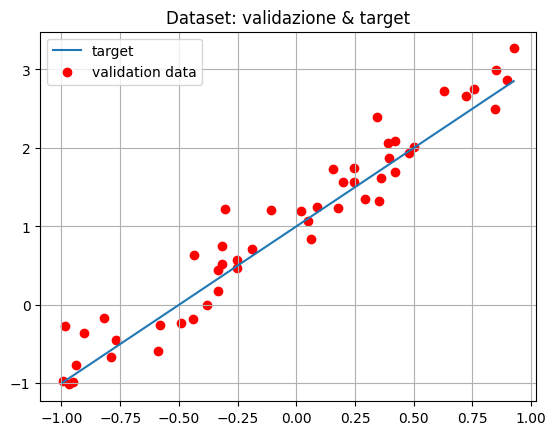

In [4]:
#Plotto dataset di test e validazione
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.title("Dataset: validazione & target")
plt.legend()

plt.grid(True)
plt.show()

In [5]:
#Creo un oggetto di tipo sequential (modello sequenziale di rete neurale)
#Modello sequenziale = pila lineare di strati neurali (informazioni passano da uno strato a quello successivo)
model = tf.keras.Sequential()

#Aggiungo un nuovo strato al modello - sto usando tipo Dense (completamente connesso)
#Primo parametro significa che layer avrà un solo neurone
#Secondo parametro (input shape) è la forma dell'input che mi devo aspettare. Ho in questo caso un vettore di dimensione 1
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

#Restituisce un'informazione di come è costruita la nostra rete neurale
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Proseguiamo ora allenando la rete neurale: l'ottimizzatore (ossia sgd) troverà il miglior modo per andare a minimizzare la 'loss function' (ossia la MSE).

In [6]:
#Alleno il modello utilizzando il dataset di allenamento
# over 30 epochs of 32 batch size each
# report training progress against validation data

#Sto allenando il modello utilizzando la funzione fit
# 1 -> x_train - sono gli input
# 2 -> y_train - sono le etichette
# 3 -> batch_size -  numero campioni di validazione che vengono utilizzati in una singola iterazione per calcolare le metriche di valutazione.
# 4 -> epochs - presenta il numero di epoche, ossia quante volte l'intero dataset viene presentato alla rete neurale per l'allenamento
# 5 -> shuffle - i dati vengono mescolati casualmente prima di ogni epoca, evito di abituarmi a ordine dati
# 6 -> validation_data - dati di validazione da utilizzare durante l'addestramento per valutare le prestazioni del modello su dati non visti durante l'addestramento
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

# return weights and biases
model.get_weights()

Epoch 1/30
16/16 [==============================] - 1s 14ms/step - loss: 1.1416 - mse: 1.1416 - val_loss: 0.9945 - val_mse: 0.9945
Epoch 2/30
16/16 [==============================] - 0s 3ms/step - loss: 0.7433 - mse: 0.7433 - val_loss: 0.6781 - val_mse: 0.6781
Epoch 3/30
16/16 [==============================] - 0s 3ms/step - loss: 0.5145 - mse: 0.5145 - val_loss: 0.4883 - val_mse: 0.4883
Epoch 4/30
16/16 [==============================] - 0s 3ms/step - loss: 0.3778 - mse: 0.3778 - val_loss: 0.3692 - val_mse: 0.3692
Epoch 5/30
16/16 [==============================] - 0s 3ms/step - loss: 0.2928 - mse: 0.2928 - val_loss: 0.2918 - val_mse: 0.2918
Epoch 6/30
16/16 [==============================] - 0s 3ms/step - loss: 0.2379 - mse: 0.2379 - val_loss: 0.2394 - val_mse: 0.2394
Epoch 7/30
16/16 [==============================] - 0s 3ms/step - loss: 0.2002 - mse: 0.2002 - val_loss: 0.2043 - val_mse: 0.2043
Epoch 8/30
16/16 [==============================] - 0s 3ms/step - loss: 0.1744 - mse: 0.1

[array([[1.9920285]], dtype=float32), array([0.966736], dtype=float32)]

Valuto ora il modello che ho ottenuto stampando a video il valore di 'loss' e l'accuratezza del metodo:

In [7]:
#Valuto il modello ottenuto
# 1 -> x_valid - features di validazione
# 2 -> y_valid - etichette di validazione
# 3 -> batch_size - campioni di validazione che vengono utilizzati in una singola iterazione per calcolare le metriche di valutazione.
# 4 -> verbose - verbose=1 controlla l'output durante la valutazione. Un valore di 1 indica di 
#                mostrare l'avanzamento della valutazione durante l'esecuzione.
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

#Il metodo evaluate() calcola e restituisce le metriche di valutazione del modello sui dati di validazione. 
#Queste metriche possono includere l'accuratezza, la perdita (loss), o altre metriche specificate durante la compilazione del modello.

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 4ms/step - loss: 0.1002 - mse: 0.1002

Test loss: 0.10019993036985397
Test accuracy: 0.10019993036985397


In [8]:
#Valuto il modello con la curva perfetta
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - mse: 0.0011    

Test loss: 0.0010990004520863295
Test accuracy: 0.0010990004520863295


4/4 [==============================] - 0s 1ms/step


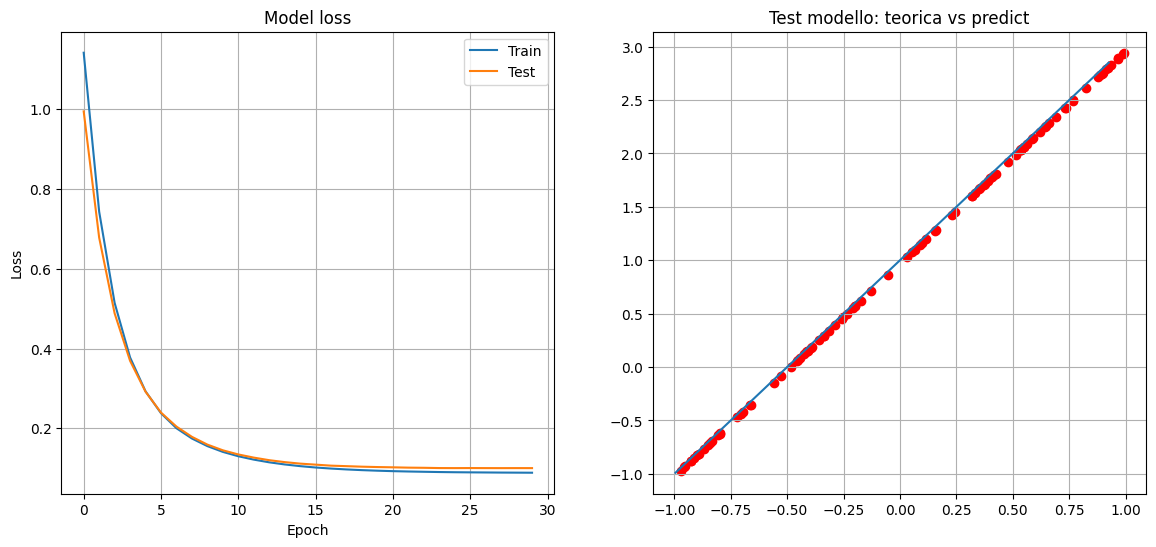

In [9]:
# look into training history
# Plot training & validation loss values
fix, ax = plt.subplots(1, 2, figsize = (14, 6))

ax[0].plot(history.history['loss'])
ax[0].plot(history.history['val_loss'])
ax[0].set_title('Model loss')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Test'], loc='best')
ax[0].grid(True)


x_predicted = np.random.uniform(-1, 1, 100)

#Il metodo predict() prende come input i dati di input x_predicted e restituisce le previsioni corrispondenti generate dal modello.
#applica il modello alle features di input per ottenere le corrispondenti previsioni di output.

y_predicted = model.predict(x_predicted)
ax[1].scatter(x_predicted, y_predicted,color='r', label = 'Modello')
ax[1].plot(x_valid, y_target, label = 'Teorica')
ax[1].set_title("Test modello: teorica vs predict")
ax[1].grid(True)

plt.show()

Voglio ora verificare come la regressione lineare dipenda dal numero di epoche (per produrre il grafico precedente sono 30) $N_{\mathrm{epo}}$, dal numero di data point di training $N_{\mathrm{train}}$ e dal rumore $\sigma$.

### Cambio numero epoche

In [10]:
loss5 = np.loadtxt('Esercizio_1/Cambio_N_epo/Loss5.dat')
loss20 = np.loadtxt('Esercizio_1/Cambio_N_epo/Loss20.dat')
loss45 = np.loadtxt('Esercizio_1/Cambio_N_epo/Loss45.dat')
loss200 = np.loadtxt('Esercizio_1/Cambio_N_epo/Loss200.dat')

valid = np.loadtxt('Esercizio_1/Cambio_N_epo/Valid.dat')
pred = np.loadtxt('Esercizio_1/Cambio_N_epo/Pred.dat')

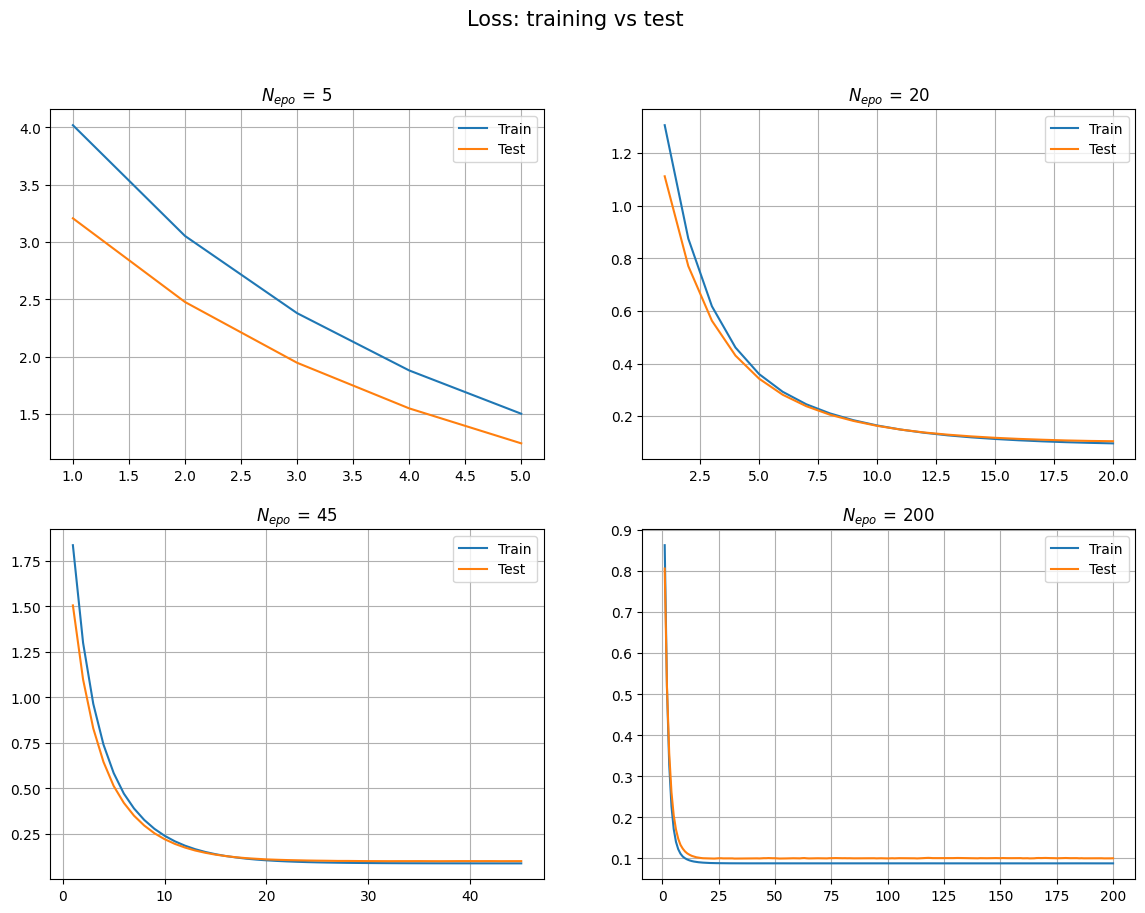

In [11]:
fig, ax = plt.subplots(2, 2, figsize = (14, 10))
N_epo = np.array([5, 20, 45, 200])

for i in range(0, 2):
    for j in range(0, 2):
        if i==0 and j==0:
            x = np.array([i for i in range(1, 6)])
            ax[i][j].plot(x, loss5[0, :])
            ax[i][j].plot(x, loss5[1, :])
        elif i==0 and j==1:
            x = np.array([i for i in range(1, 21)])
            ax[i][j].plot(x, loss20[0, :])
            ax[i][j].plot(x, loss20[1, :])
        elif i==1 and j==0:
            x = np.array([i for i in range(1, 46)])
            ax[i][j].plot(x, loss45[0, :])
            ax[i][j].plot(x, loss45[1, :])
        elif i==1 and j==1:
            x = np.array([i for i in range(1, 201)])
            ax[i][j].plot(x, loss200[0, :])
            ax[i][j].plot(x, loss200[1, :])
        
        ax[i][j].set_title(r'$N_{epo}\,=\,$' + str(N_epo[2*i+j]))
        ax[i][j].legend(['Train', 'Test'], loc='best')
        ax[i][j].grid(True)

        
        
fig.suptitle('Loss: training vs test',fontsize = '15')
plt.show()

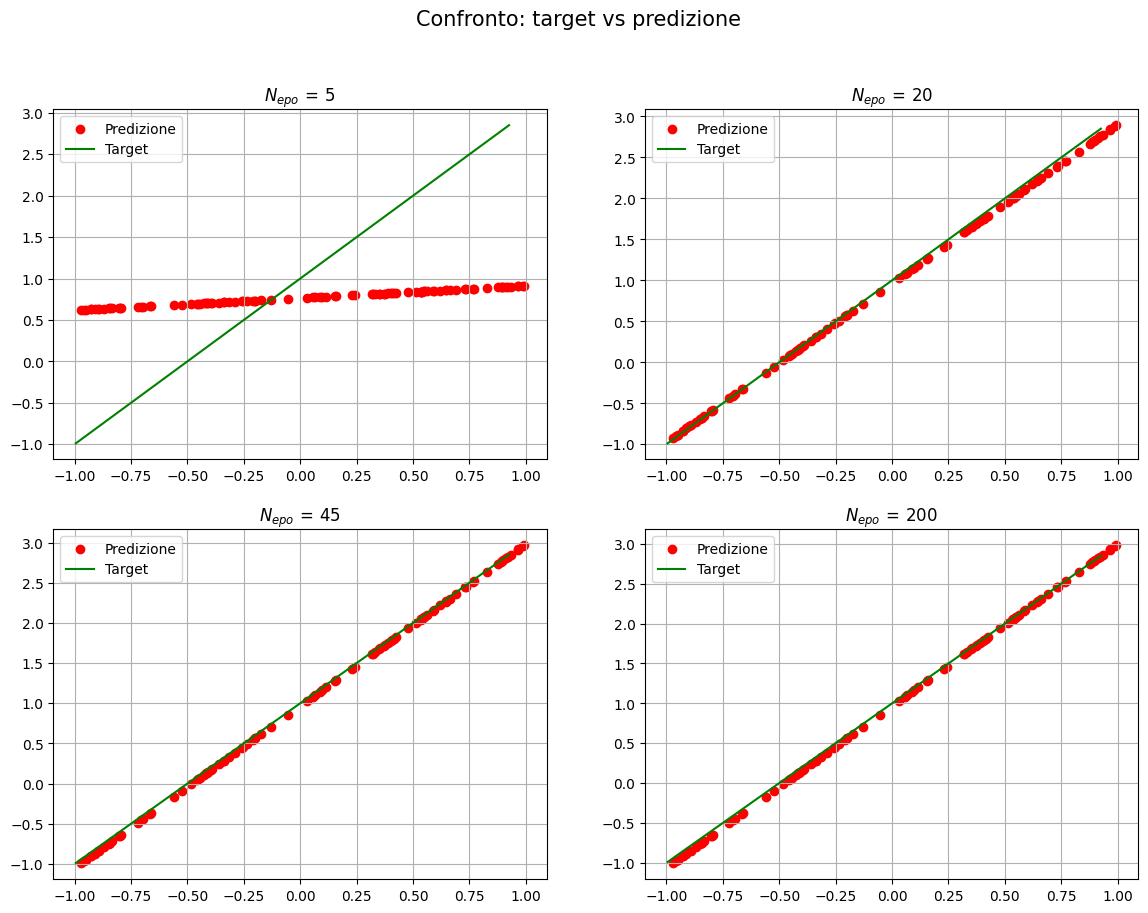

In [12]:
fig, ax = plt.subplots(2, 2, figsize = (14, 10))
N_epo = np.array([5, 20, 45, 200])

for i in range(0, 2):
    for j in range(0, 2):
        if i==0 and j==0:
            ax[i][j].scatter(pred[0, :], pred[1, :], color = 'red')
        elif i==0 and j==1:
            ax[i][j].scatter(pred[2, :], pred[3, :], color = 'red')
        elif i==1 and j==0:
            ax[i][j].scatter(pred[4, :], pred[5, :], color = 'red')
        elif i==1 and j==1:
            ax[i][j].scatter(pred[6, :], pred[7, :], color = 'red')
        
        ax[i][j].plot(valid[0, :], valid[1, :], color = 'green')
        ax[i][j].set_title(r'$N_{epo}\,=\,$' + str(N_epo[2*i+j]))
        ax[i][j].legend(['Predizione', 'Target'], loc='best')
        ax[i][j].grid(True)

        
        
fig.suptitle('Confronto: target vs predizione',fontsize = '15')
plt.show()

Si nota chiaramente nei due grafici riportati in precedenza che se il numero di epoche è troppo basso (ossia $N_{epo}\,=\,5$) la rete neurale non è ancora riuscita ad allenarsi abbastanza ed il risultato ottenuto è scarso. Tuttavia per un numero molto elevato di epoche($N_{epo}\,=\,200$) c'è il rischio che la NN si abitui troppo ai dati di training e tenda a fare over-fitting.

### Cambio numero punti di Training

In [13]:
loss = np.loadtxt('Esercizio_1/Cambio_N_train/Loss.dat')
pred_t = np.loadtxt('Esercizio_1/Cambio_N_train/Pred.dat')

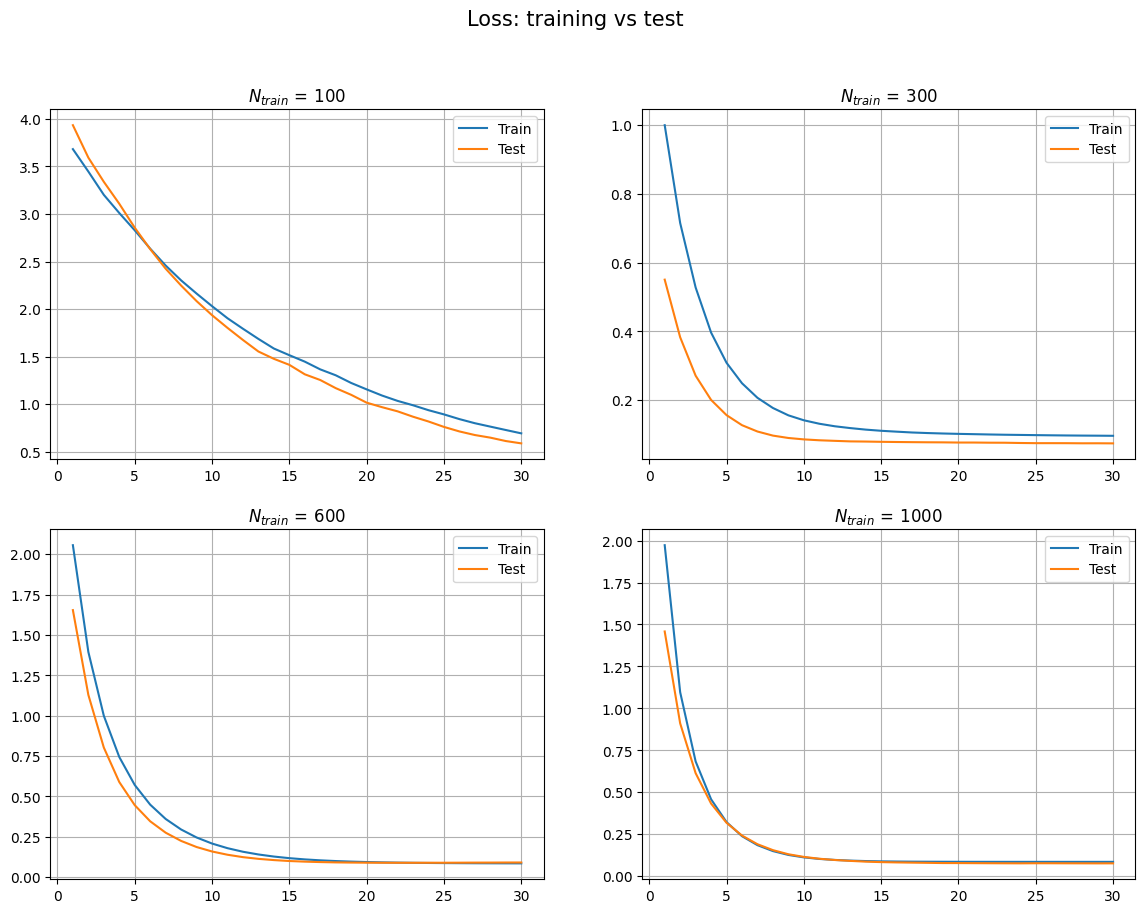

In [14]:
fig, ax = plt.subplots(2, 2, figsize = (14, 10))
titoli = np.array([100, 300, 600, 1000])

for i in range(0, 2):
    for j in range(0, 2):
        x = np.array([i for i in range(1, 31)])
        ax[i][j].plot(x, loss[2*(2*i+j), :], label = 'Train')
        ax[i][j].plot(x, loss[2*(2*i+j)+1, :], label = 'Prediction')
        
        ax[i][j].set_title(r'$N_{train}\,=\,$' + str(titoli[2*i+j]))
        ax[i][j].grid(True)   
        ax[i][j].legend(['Train', 'Test'], loc='best')
        
fig.suptitle('Loss: training vs test',fontsize = '15')
plt.show()

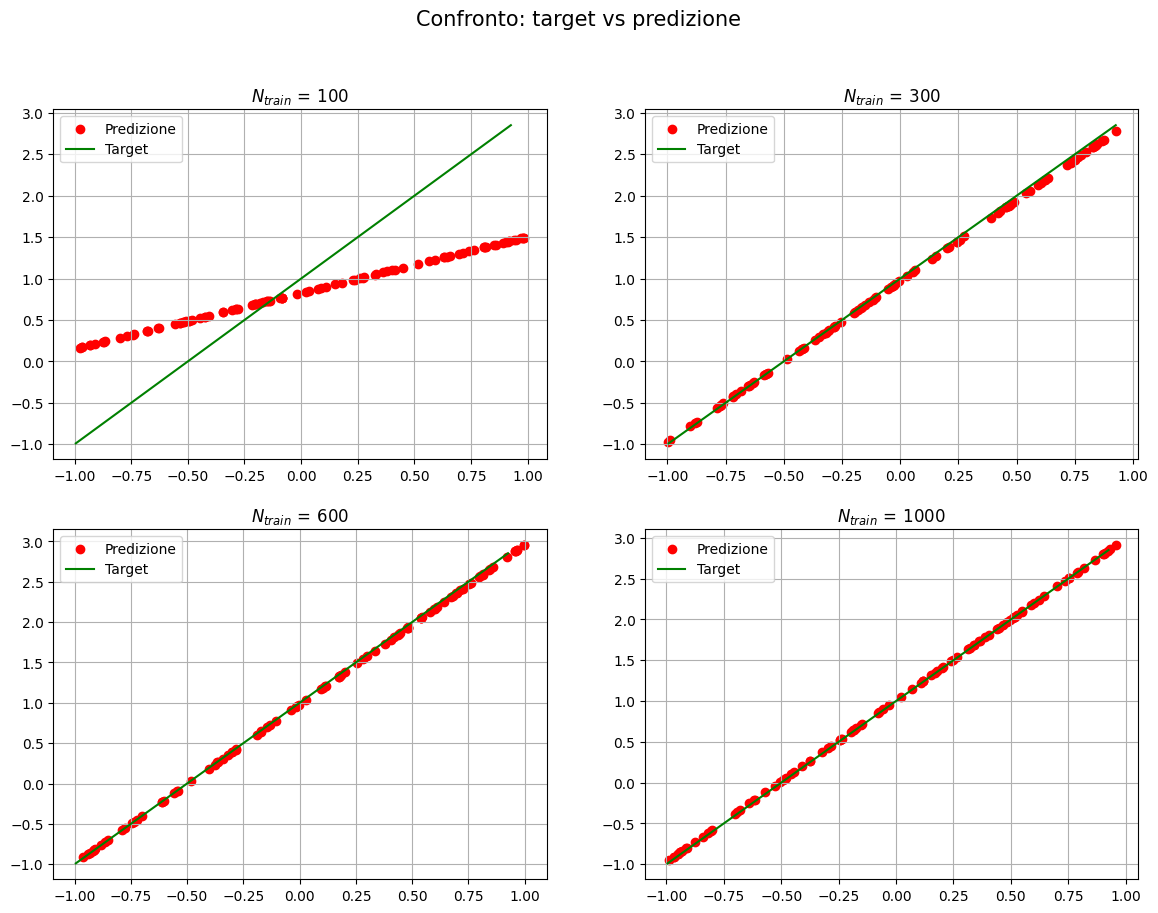

In [15]:
fig, ax = plt.subplots(2, 2, figsize = (14, 10))

for i in range(0, 2):
    for j in range(0, 2):
        if i==0 and j==0:
            ax[i][j].scatter(pred_t[0, :], pred_t[1, :], color = 'red')
        elif i==0 and j==1:
            ax[i][j].scatter(pred_t[2, :], pred_t[3, :], color = 'red')
        elif i==1 and j==0:
            ax[i][j].scatter(pred_t[4, :], pred_t[5, :], color = 'red')
        elif i==1 and j==1:
            ax[i][j].scatter(pred_t[6, :], pred_t[7, :], color = 'red')
        
        ax[i][j].plot(valid[0, :], valid[1, :], color = 'green')
        ax[i][j].set_title(r'$N_{train}\,=\,$' + str(titoli[2*i+j]))
        ax[i][j].legend(['Predizione', 'Target'], loc='best')
        ax[i][j].grid(True)

        
        
fig.suptitle('Confronto: target vs predizione',fontsize = '15')
plt.show()

Ho ora fissato il numero di epoche a 30: procedo cambiando le dimensioni del data-set di training. Ciò che osservo è che per data-set troppo piccoli l'allenamento risulta difficoltoso: andando ad aumentarne le dimensioni si tende a soluzioni ottimizzate. Noto che già 600 punti è un buon compromesso.

### Cambio valori di sigma

In [16]:
loss = np.loadtxt('Esercizio_1/Cambio_sig/Loss.dat')
pred_t = np.loadtxt('Esercizio_1/Cambio_sig/Pred.dat')

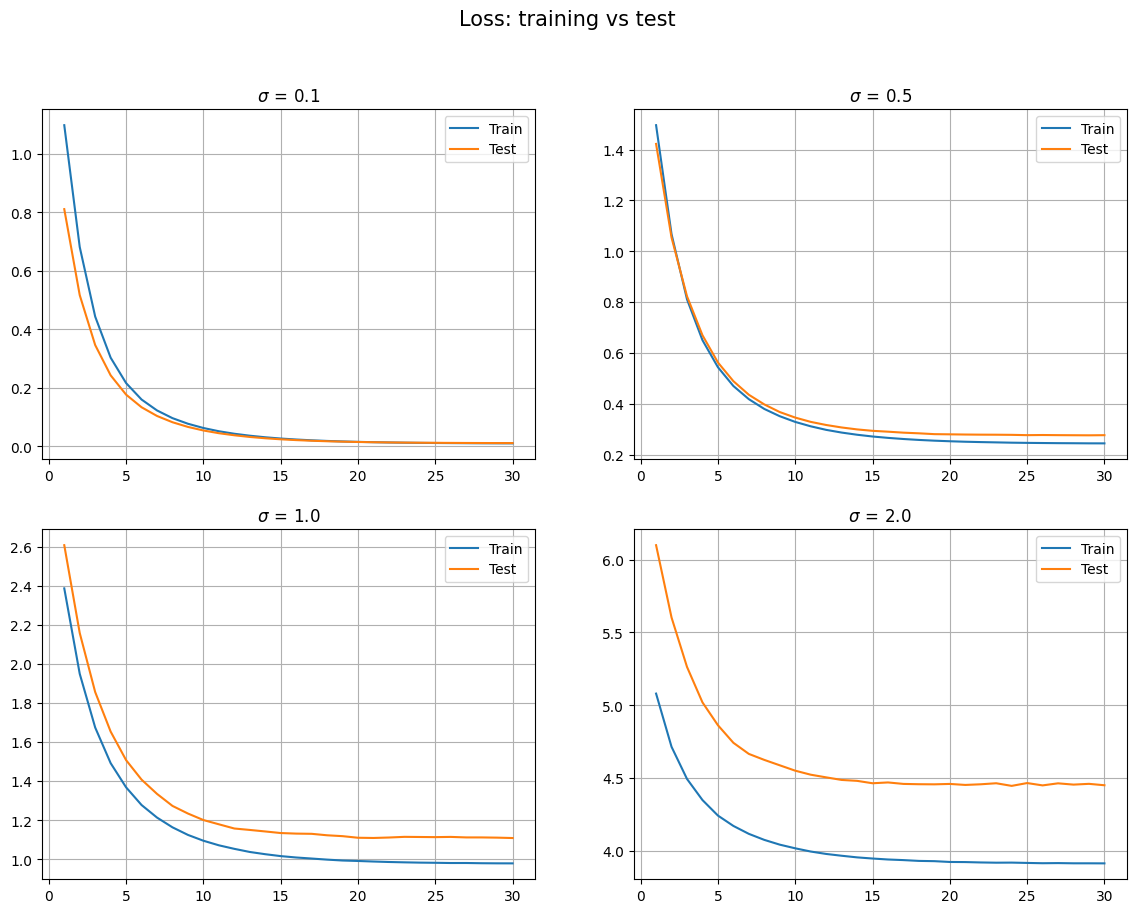

In [17]:
fig, ax = plt.subplots(2, 2, figsize = (14, 10))
titoli = np.array([0.1, 0.5, 1, 2])

for i in range(0, 2):
    for j in range(0, 2):
        x = np.array([i for i in range(1, 31)])
        ax[i][j].plot(x, loss[2*(2*i+j), :], label = 'Train')
        ax[i][j].plot(x, loss[2*(2*i+j)+1, :], label = 'Prediction')
        
        ax[i][j].set_title(r'$\sigma\,=\,$' + str(titoli[2*i+j]))
        ax[i][j].grid(True)   
        ax[i][j].legend(['Train', 'Test'], loc='best')
        
fig.suptitle('Loss: training vs test',fontsize = '15')
plt.show()

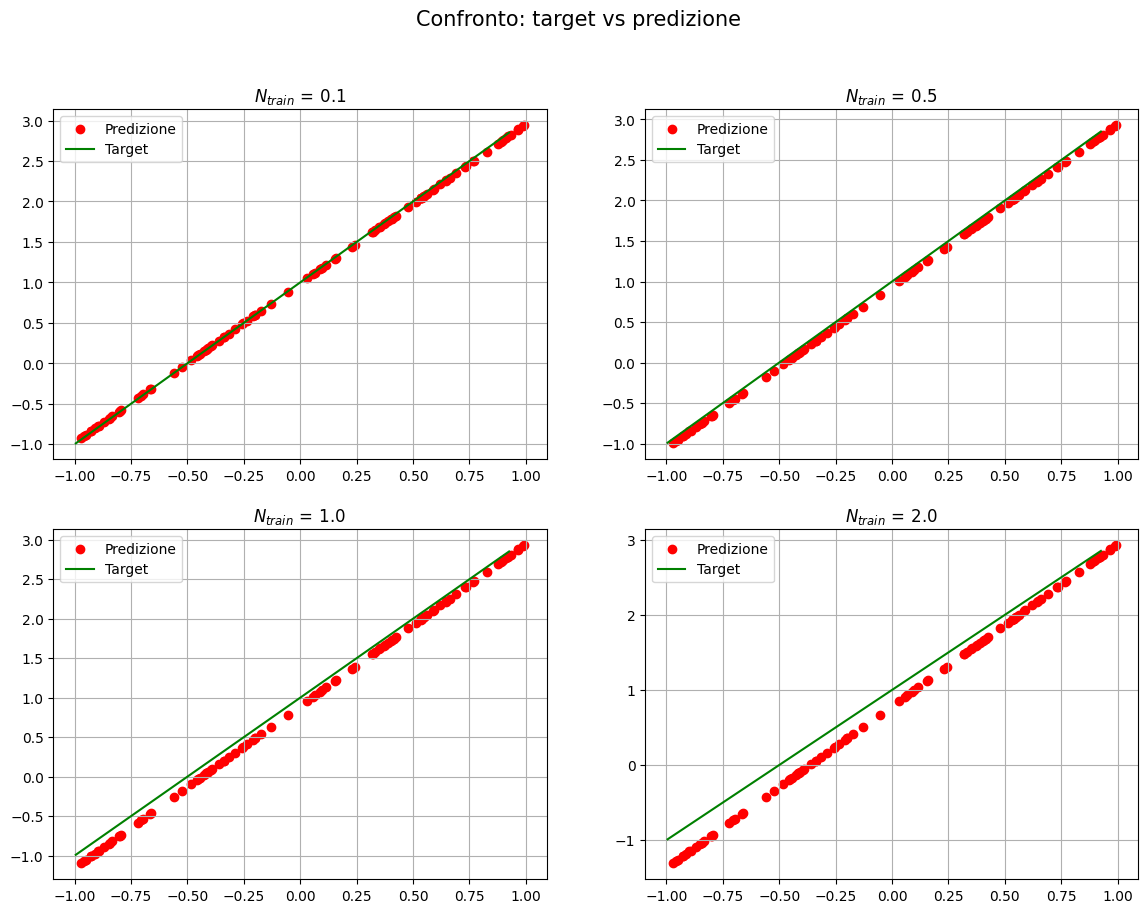

In [18]:
fig, ax = plt.subplots(2, 2, figsize = (14, 10))

for i in range(0, 2):
    for j in range(0, 2):
        if i==0 and j==0:
            ax[i][j].scatter(pred_t[0, :], pred_t[1, :], color = 'red')
        elif i==0 and j==1:
            ax[i][j].scatter(pred_t[2, :], pred_t[3, :], color = 'red')
        elif i==1 and j==0:
            ax[i][j].scatter(pred_t[4, :], pred_t[5, :], color = 'red')
        elif i==1 and j==1:
            ax[i][j].scatter(pred_t[6, :], pred_t[7, :], color = 'red')
        
        ax[i][j].plot(valid[0, :], valid[1, :], color = 'green')
        ax[i][j].set_title(r'$N_{train}\,=\,$' + str(titoli[2*i+j]))
        ax[i][j].legend(['Predizione', 'Target'], loc='best')
        ax[i][j].grid(True)

        
        
fig.suptitle('Confronto: target vs predizione',fontsize = '15')
plt.show()

Cambio ora l'entità del rumore sui data-set di training e validation: ciò che osservo è che all'aumentare di $\sigma$ risulta più difficile effettuare il fit lineare.

<span style="color: blue;">

## Esercizio 2

</span>

Voglio ottenere un fit ragionevole del polinomio di terzo grado:
$$
f(x)=4-3x-2x^2+3x^3
$$
per $x \in [-1,1]$. Per fare questo provo diverse combinazioni di:

- numero di layer
- numero di neuroni
- funzione di attivazione
- ottimizzatore
- funzione di costo

Il codice che ho utilizzato per ottenere questo fit si trova nella cartella Esercizio_2.

Provando diverse combinazioni dei parametri caratterizzanti la NN ho osservato che ottenevo dei buoni risultati con:
$$
\begin{cases}
    N_{train}\,=\,2500 \\
    N_{val}\,=\,250
\end{cases}
$$
La rete neurale che utilizzo presenta 3 layers totalmente connessi. Il primo è costituito da 6 neuroni, il secondo da 8 ed il terzo da un singolo neurone. L'input shape è un vettore di dati, mentre la funzione di attivazione è 'tanh'. Come ottimizzatore utilizzo SGD, del quale specifico learning rate (0.01) e momentum (0.9). La loss function che utilizzo è 'mse'. Alleno la rete per 50 epoche, anche se sarebbe possibile diminuirne il numero, a vedere dal grafico della Model Loss.

In [19]:
loss = np.loadtxt('Esercizio_2/Loss.dat')
pred1 = np.loadtxt('Esercizio_2/Pred1.dat')
pred2 = np.loadtxt('Esercizio_2/Pred2.dat')

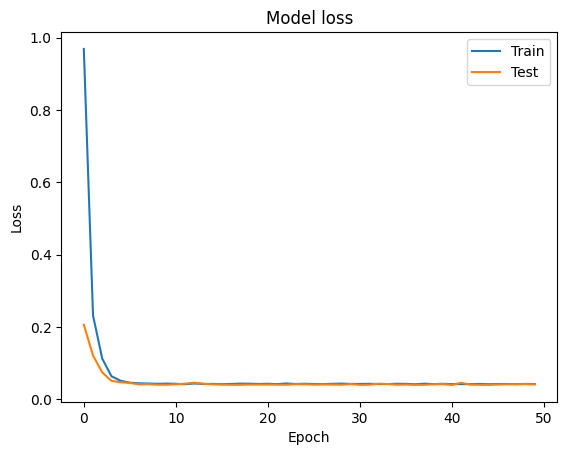

In [20]:
#Stampo valore Loss-Function
plt.plot(loss[0, :], label = 'Train')
plt.plot(loss[1, :], label = 'Test')

plt.legend()
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Model loss')

plt.show()

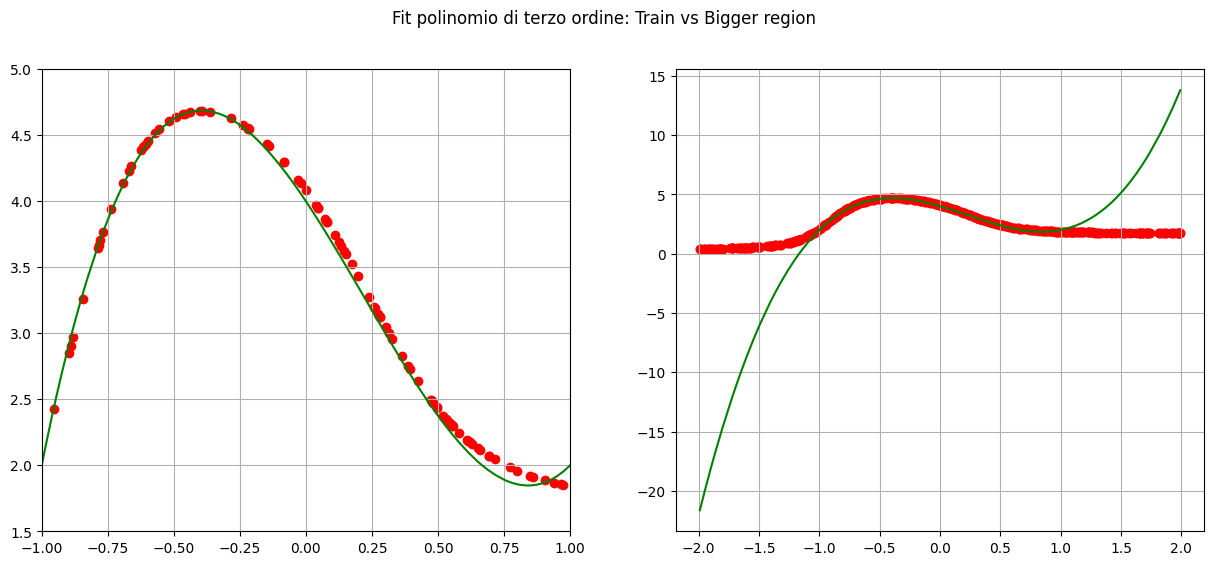

In [21]:
fig, ax = plt.subplots(1, 2, figsize = (15, 6))

for i in range(0, 2):
    ax[i].plot(pred2[2,:], pred2[3, :], color = 'green')
    if i==0:
        ax[i].scatter(pred1[0, :], pred1[1, :], color = 'red')
        ax[i].set_xlim(-1, 1)
        ax[i].set_ylim(1.5, 5)
    
    else:
        ax[i].scatter(pred2[0, :], pred2[1, :], color = 'red')
    
    ax[i].grid(True)

fig.suptitle("Fit polinomio di terzo ordine: Train vs Bigger region")
plt.show()

La NN riesce ad effettuare delle predizioni (punti rossi) in buon accordo con la funzione di target se consideriamo l'intervallo di training, ossia $x\in\left[-1,\,1\right]$. Al di fuori di questo range perdo l'accuratezza delle predizioni.

<span style="color: blue;">

## Esercizio 3

</span>

L'obiettivo dell'esercizio 3 è fittare una funzione a due variabili, ossia:
$$
f(x,y) = \sin(x^2+y^2)
$$
per $x \in [-3/2,3/2]$ e $y \in [-3/2,3/2]$.

In [22]:
#Genero i dataset di training e controllo
np.random.seed(0)

Ntrain = 5000
Ntest = 500

#Ascisse e ordinate per trainig
x_train = np.random.uniform(-1.5, 1.5, Ntrain)
y_train = np.random.uniform(-1.5, 1.5, Ntrain)

#Ascisse e orinate per validation
x_valid = np.random.uniform(-1.5, 1.5, Ntest)
y_valid = np.random.uniform(-1.5, 1.5, Ntest)

#Riordino in ordine crescente ascisse e ordinate per validazione
x_valid.sort()
y_valid.sort()

#Calcolo valore della funzione per test
z_target = np.sin(pow(x_valid, 2) + pow(y_valid, 2))

#Genero rumori su valori di z per training e test
sigma = 0.1 # noise standard deviation
z_train = np.random.normal(np.sin(pow(x_train, 2) + pow(y_train, 2)),sigma)
z_valid = np.random.normal(np.sin(pow(x_valid, 2) + pow(y_valid, 2)),sigma)

La rete neurale che utilizzo è costituita da 5 strati densamente connessi. I numeri di neuroni per strato sono:
$$
\begin{cases}
    N_1\,=\,120 \\
    N_2\,=\,60 \\
    N_3\,=\,30 \\
    N_4\,=\,15 \\
    N_5\,=\,1 \\
\end{cases}
$$
La shape di input non è più un singolo vettore, ma un vettore di coppie (data la maggiore complessità della funzione che stiamo andando a studiare) e la funzione di attivazione scelta è per tutti 'relu'. L'ottimizzatore scelto è 'adam', mentre la loss function è data da 'mse'. Il numero di epoche con cui lavoro è 20.

In [23]:
model2 = tf.keras.Sequential([
    keras.layers.Dense(120, activation='relu', input_shape=(2,)),
    keras.layers.Dense(60, activation='relu'),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1)
])

# compile the model choosing optimizer, loss and metrics objects
model2.compile(optimizer='adam', loss='mse')

history = model2.fit(x=np.column_stack((x_train,y_train)), y=z_train, 
          batch_size=32, epochs=20,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(np.column_stack((x_valid,y_valid)), z_valid))

Epoch 1/20
157/157 [==============================] - 2s 3ms/step - loss: 0.1733 - val_loss: 0.3501
Epoch 2/20
157/157 [==============================] - 0s 2ms/step - loss: 0.1066 - val_loss: 0.1691
Epoch 3/20
157/157 [==============================] - 0s 2ms/step - loss: 0.0392 - val_loss: 0.0351
Epoch 4/20
157/157 [==============================] - 0s 3ms/step - loss: 0.0151 - val_loss: 0.0146
Epoch 5/20
157/157 [==============================] - 0s 2ms/step - loss: 0.0133 - val_loss: 0.0223
Epoch 6/20
157/157 [==============================] - 0s 2ms/step - loss: 0.0127 - val_loss: 0.0185
Epoch 7/20
157/157 [==============================] - 0s 2ms/step - loss: 0.0121 - val_loss: 0.0136
Epoch 8/20
157/157 [==============================] - 0s 2ms/step - loss: 0.0124 - val_loss: 0.0122
Epoch 9/20
157/157 [==============================] - 0s 2ms/step - loss: 0.0132 - val_loss: 0.0121
Epoch 10/20
157/157 [==============================] - 0s 2ms/step - loss: 0.0119 - val_loss: 0.0136

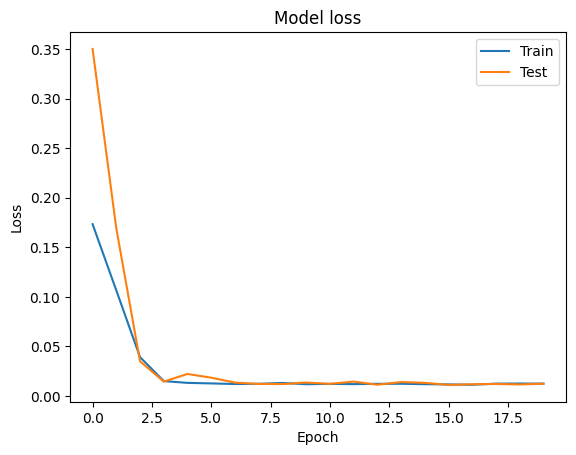

In [24]:
appo = history.history['loss']
pippo = history.history['val_loss']

plt.plot(appo)
plt.plot(pippo)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

313/313 [==============================] - 0s 1ms/step


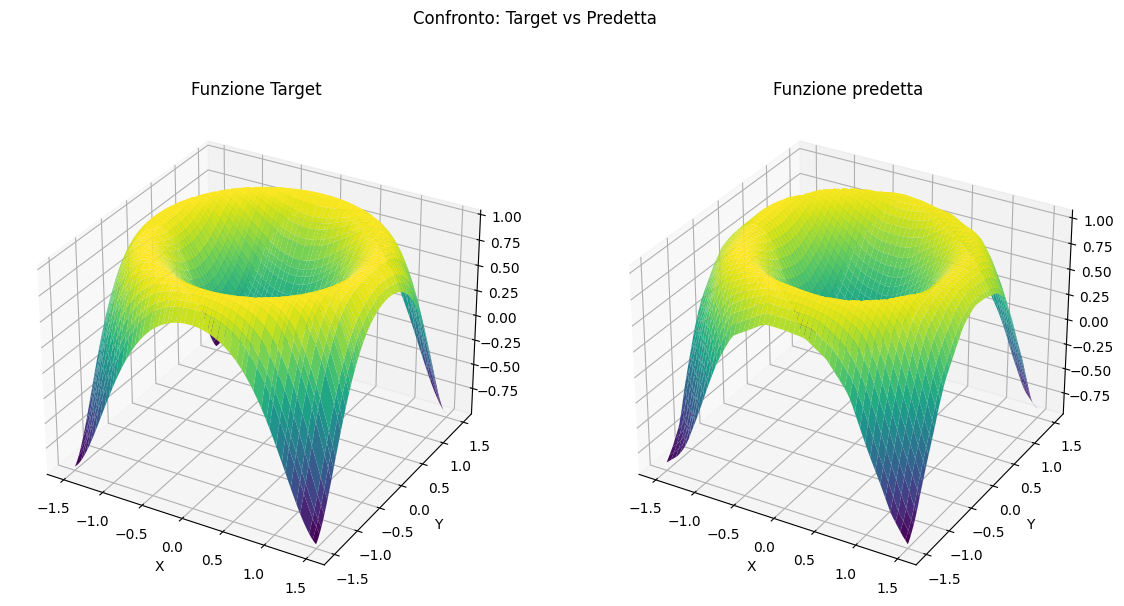

In [25]:
# Definizione della funzione di due variabili
def my_function(x, y):
    return np.sin(pow(x, 2) + pow(y, 2))

# Generazione dei dati per il plot
x = x_valid
y = y_valid
X, Y = np.meshgrid(x, y)
Z = my_function(X, Y)

# Creazione del grafico 3D
fig = plt.figure(figsize = (14, 7))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis')
ax1.set_title('Funzione Target')

# Personalizzazione dell'aspetto del grafico
ax1.set_xlabel('X')
ax1.set_ylabel('Y')


# Generazione dei dati per il plot
x = np.linspace(-1.5, 1.5, 100)
y = np.linspace(-1.5, 1.5, 100)
X, Y = np.meshgrid(x, y)
Z = model2.predict(np.column_stack((X.flatten(), Y.flatten()))).reshape(X.shape)


ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X, Y, Z, cmap='viridis')

# Personalizzazione dell'aspetto del grafico
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Funzione predetta')


fig.suptitle('Confronto: Target vs Predetta')
plt.show()

Il fit è di buona qualità, infatti la funzione predetta si avvicina di molto a quella teorica.